# Demonstration of Matplotlib Colormaps<br>Different from Official Documents
## Selected and organised by Yu Geng<br>Last update: 2017-10-22
### Additional notes
* matplotlib default size: [6.0, 4.0]
* seaborn    default size: [8.0, 5.5]

### Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Scatter plot

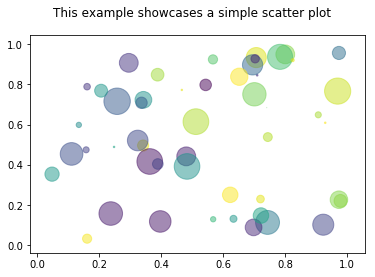

In [2]:
# sns.reset_orig()  # temporarily reset to default matplotlib

plt.suptitle("This example showcases a simple scatter plot")

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)  # you can specify cmap here
plt.show()                                      # but the default is the best

# import seaborn as sns  # retreat seaborn

### Chessboard
Based on the example: https://matplotlib.org/gallery/images_contours_and_fields/layer_images.html

In [3]:
from __future__ import division

def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))

# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

extent = np.min(x), np.max(x), np.min(y), np.max(y)

Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
Z2 = func3(X, Y)

def chessboard(extent, Z1, Z2, cmap1='jet', cmap2='rainbow'):
    plt.rcParams['figure.figsize'] = [12, 4.0]
    fig = plt.figure(frameon=False)
    plt.suptitle('This example showcases a nearest-neighbor interpolation')
    
    plt.subplot(1,2,1)
    plt.title('MATLAB look')
    im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                     extent=extent)
    im2 = plt.imshow(Z2, cmap=cmap1, alpha=.9, interpolation='bilinear',
                     extent=extent)
    
    plt.subplot(1,2,2)
    plt.title('GMT look')
    im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                     extent=extent)
    im2 = plt.imshow(Z2, cmap=cmap2, alpha=.9, interpolation='bilinear',
                     extent=extent)
    
    plt.show()

### Try with different colormaps

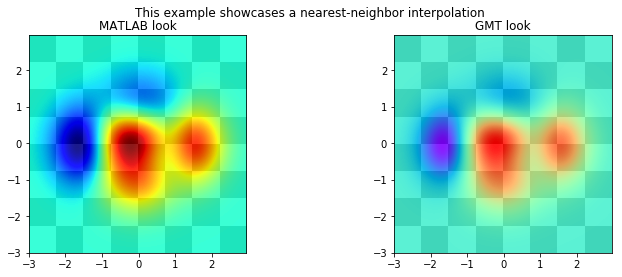

CPU times: user 598 ms, sys: 24.2 ms, total: 622 ms
Wall time: 635 ms


In [4]:
%time chessboard(extent, Z1, Z2)

### 3D scatter plot
Based on: http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_3d/

In [5]:
xyz=np.array(np.random.random((100,3)))

x=xyz[:,0]
y=xyz[:,1]
z=xyz[:,2]*100

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def scatter_3d(x,y,z,cmap1='viridis',cmap2='Spectral'):
    plt.rcParams['figure.figsize'] = [12, 4.0]
    fig = plt.figure()
    
    ax = plt.subplot(121, projection='3d')
    pnt3d=ax.scatter(x,y,z,c=z,cmap=cmap1)
    cbar=plt.colorbar(pnt3d)
    cbar.set_label("Values (units)")
    plt.title(cmap1)
    # plt.show()
    
    # fig = plt.figure()
    ax = plt.subplot(122, projection='3d')
    pnt3d=ax.scatter(x,y,z,c=z,cmap=cmap2)
    cbar=plt.colorbar(pnt3d)
    cbar.set_label("Values (units)")
    plt.title(cmap2)
    
    plt.show()

### Try with different colormaps

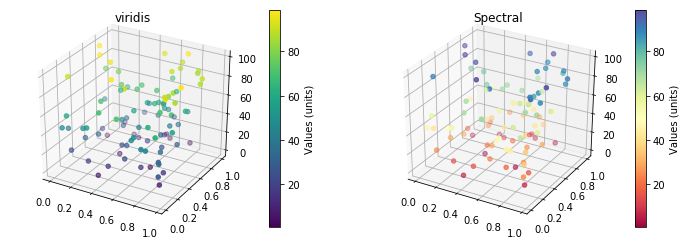

CPU times: user 1.04 s, sys: 28.4 ms, total: 1.07 s
Wall time: 1.2 s


In [6]:
%time scatter_3d(x,y,z)

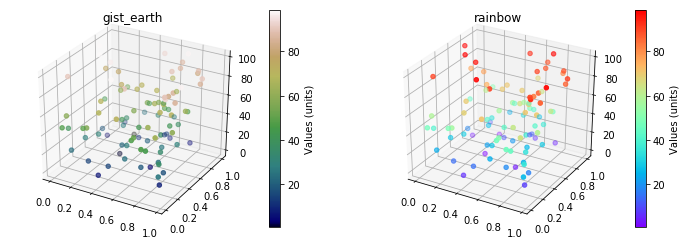

CPU times: user 1.1 s, sys: 22.6 ms, total: 1.12 s
Wall time: 1.15 s


In [7]:
%time scatter_3d(x,y,z,'gist_earth','rainbow')

### Insert griddata_demo.py
The original source code is from https://matplotlib.org/examples/pylab_examples/griddata_demo.html

In [8]:
from pylab import *
import matplotlib

def griddata_demo(colormap='Spectral'):
    # make up data.
    #npts = int(raw_input('enter # of random points to plot:'))
    seed(0)
    npts = 200
    x = uniform(-2, 2, npts)
    y = uniform(-2, 2, npts)
    z = x*np.exp(-x**2 - y**2)
    # define grid.
    xi = linspace(-2.1, 2.1, 100)
    yi = linspace(-2.1, 2.1, 200)
    # grid the data.
    zi = griddata(x, y, z, xi, yi, interp='linear')
    
    ## Create side-by-side figure to demonstrate different types.
    
    figure
    rcParams['figure.figsize'] = [12, 4.0]
    suptitle(colormap)
    smoother_1, smoother_2 = 15, 60
    
    subplot(1,2,1)
    title('Contour (# of levels = %d)' % smoother_1)
    
    # contour the gridded data, plotting dots at the nonuniform data points.
    CS = contour(xi, yi, zi, smoother_1, linewidths=0.5, colors='k')
    CS = contourf(xi, yi, zi, smoother_1,
                  vmax=abs(zi).max(), vmin=-abs(zi).max(), cmap=colormap)
    
    # normalize colorscale
    norm = matplotlib.colors.Normalize(vmin=CS.vmin, vmax=CS.vmax)
    sm = cm.ScalarMappable(norm=norm, cmap=CS.cmap)
    sm.set_array([])
    
    # create a continuous colorbar
    # colorbar(sm, ticks=CS.levels)  # do not reset tickmarks
    colorbar(sm)  # use default
    
    # plot data points.
    # scatter(x, y, marker='o', s=5, zorder=10)
    xlim(-2, 2)
    ylim(-2, 2)
    
    subplot(1,2,2)
    title('Surface (# of levels = %d)' % smoother_2)
    
    # contour the gridded data, plotting dots at the nonuniform data points.
    # CS = contour(xi, yi, zi, smoother_1, linewidths=0.5, colors='k')
    CS = contourf(xi, yi, zi, smoother_2,
                  vmax=abs(zi).max(), vmin=-abs(zi).max(), cmap=colormap)
    # the more levels you have, the smoother the surface you get
    
    # normalize colorscale
    norm = matplotlib.colors.Normalize(vmin=CS.vmin, vmax=CS.vmax)
    sm = cm.ScalarMappable(norm=norm, cmap=CS.cmap)
    sm.set_array([])
    
    # create a continuous colorbar
    # colorbar(sm, ticks=CS.levels)  # do not reset tickmarks
    colorbar(sm)  # use default
    
    # plot data points.
    scatter(x, y, marker='o', s=5, zorder=10)
    xlim(-2, 2)
    ylim(-2, 2)
    
    show()

### Try with different colormaps

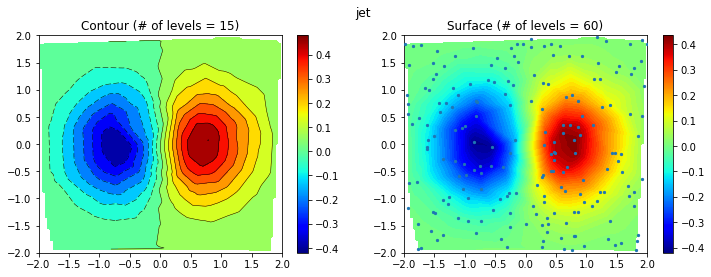

CPU times: user 1.24 s, sys: 41.6 ms, total: 1.28 s
Wall time: 1.45 s


In [10]:
%time griddata_demo('jet')  # MATLAB R2014a-

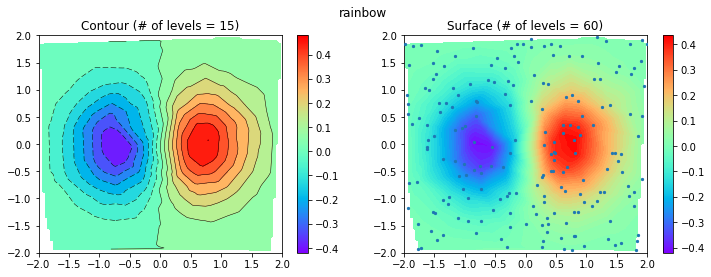

CPU times: user 1.32 s, sys: 25 ms, total: 1.34 s
Wall time: 1.44 s


In [11]:
%time griddata_demo('rainbow')  # MATLAB R2014b+